In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

(X_train, y_train), (X_test, y_test) = mnist.load_data()

pd.DataFrame(y_train).head(10)

,0
0,5
1,0
2,4
3,1
4,9
5,2
6,1
7,3
8,1
9,4


In [3]:
#print(X_train.shape)

X_train = X_train.reshape((X_train.shape[0], 28 * 28)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28 * 28)).astype('float32') / 255

#print(X_train.shape)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

pd.DataFrame(y_train).head(10)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [4]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'recall', 'precision'])

model.fit(X_train, y_train, epochs=5, batch_size=20, validation_split=0.2)


Epoch 1/5


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2400/2400 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8714 - loss: 0.4358 - precision: 0.9299 - recall: 0.8089 - val_accuracy: 0.9561 - val_loss: 0.1502 - val_precision: 0.9646 - val_recall: 0.9507
Epoch 2/5
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9652 - loss: 0.1134 - precision: 0.9712 - recall: 0.9600 - val_accuracy: 0.9682 - val_loss: 0.1045 - val_precision: 0.9720 - val_recall: 0.9645
Epoch 3/5
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9771 - loss: 0.0728 - precision: 0.9812 - recall: 0.9743 - val_accuracy: 0.9712 - val_loss: 0.0995 - val_precision: 0.9745 - val_recall: 0.9680
Epoch 4/5
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9818 - loss: 0.0573 - precision: 0.9839 - recall: 0.9799 - val_accuracy: 0.9716 - val_loss: 0.1057 - val_precision: 0.9744 - val_recall: 0.9688
Epoch 5/5
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9858 - loss: 0.0437 - precision: 0.9874 - recall: 0.9842 - val_accuracy: 0.9695 - val_loss: 0.1067 

In [5]:
ypred = model.predict(X_test)

print(y_test.shape, ypred.shape)

y_pred_classes = tf.argmax(ypred, axis=1)  # Преобразование one-hot encoding в классы
y_true_classes = tf.argmax(y_test, axis=1)  # Преобразование one-hot encoding в классы

print(classification_report(y_true_classes, y_pred_classes))
print(confusion_matrix(y_true_classes, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step
(10000, 10) (10000, 10)
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.99      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.99      0.96      0.97       982
           5       0.95      0.98      0.96       892
           6       0.98      0.98      0.98       958
           7       0.98      0.95      0.97      1028
           8       0.97      0.96      0.97       974
           9       0.95      0.97      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

[[ 961    1    5    1    1    2    5    2    1    1]
 [   0 1118    3    0    0    2    3    2    7    0]
 [   2    0 1017    3    2    0    2    3    3    0]
 [   0    0   1

пресижн - верно определенная принадлежность классу / всеобщая зафиксированная моделью принажлежность классу

рекол - верно определенная принадженость классу / всех объектов в принципе

F1 - 2 * (prec * rec)/(prec + rec)

In [6]:
def predict_multiple_images(num_images=10):

    random_indices = np.random.choice(X_test.shape[0], num_images, replace=False)

    random_images = X_test[random_indices]
    true_labels = np.argmax(y_test[random_indices], axis=1)  # Истинные метки

    random_images_reshaped = random_images.reshape(num_images, 28 * 28)

    predictions = model.predict(random_images_reshaped)
    predicted_labels = np.argmax(predictions, axis=1)

    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(random_images[i].reshape(28, 28), cmap='gray')
        plt.title(f'Истинная: {true_labels[i]}\nПредсказанная: {predicted_labels[i]}')
        plt.axis('off')
    
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


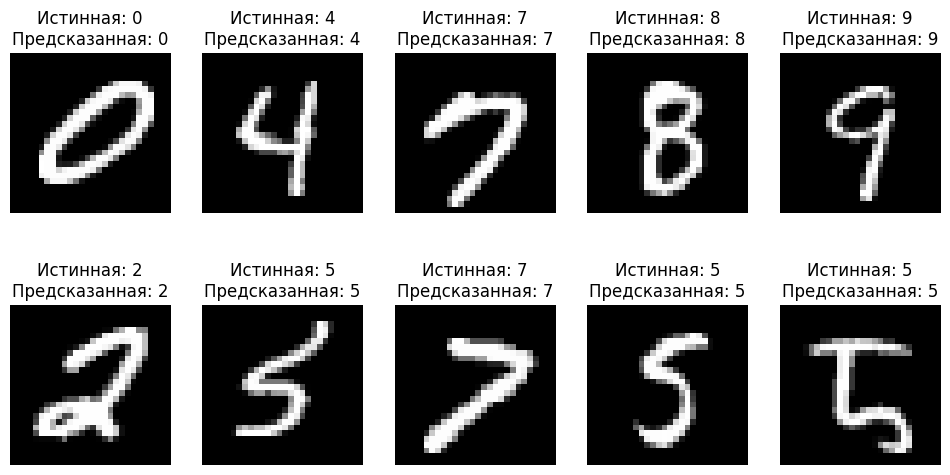

In [17]:
predict_multiple_images(10)

In [7]:
weights = model.get_weights()

for i, w in enumerate(weights):
    print(f"Layer {i} weights:\n{w}\n")


Layer 0 weights:
[[ 0.00409651  0.06123502 -0.00678478 ... -0.06893806 -0.00409972
  -0.04880625]
 [-0.03861091 -0.00499721 -0.06650211 ... -0.06828158 -0.02476262
  -0.04051747]
 [ 0.05421191 -0.02373274  0.02781273 ... -0.06559306  0.05680973
  -0.00913364]
 ...
 [-0.05208152 -0.00037992  0.01072547 ... -0.05871541  0.07510004
  -0.01155396]
 [-0.06996759 -0.05068383  0.02718505 ... -0.08044354  0.05056285
   0.07625339]
 [-0.00506566  0.02154184  0.06683189 ...  0.07361557  0.02944887
   0.02077388]]

Layer 1 weights:
[-1.64068434e-02  7.42401555e-02  1.00259781e-01 -5.99757489e-03
  4.52893116e-02 -4.27221358e-02  4.73752506e-02  7.71167725e-02
  1.51707873e-01 -3.79513651e-02  3.84338573e-02  1.00424543e-01
 -7.56150261e-02  8.07199851e-02 -3.14985774e-02  1.25168804e-02
 -8.67267791e-03  4.06714482e-03  1.61753118e-01 -5.81735671e-02
  1.71771161e-02 -2.62700468e-02 -6.05030134e-02 -5.45869544e-02
 -9.53898951e-02 -5.75471669e-02  1.99257452e-02 -1.69244930e-02
 -6.23917021e-03 -